# Aula Prática 04

## Objetivos desta aula:

    - Fourier
    - Filtragem no domnínio da frequência


## Yuri Diego Santos Niitsuma - 2011039023

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy import ndimage
import matplotlib.colors as colors
%matplotlib inline


In [2]:
# Funcao para plotar uma imagem qualquer
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()
    
    
def plot_both(img, freq):
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharey=True)
    
    ax1.imshow(img, norm=colors.Normalize())
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.imshow(np.fft.fftshift(np.abs(freq)), norm=colors.LogNorm(vmin=5))
    ax2.set_xticks([])
    ax2.set_yticks([])
    
    plt.show()

## Abrindo a imagem

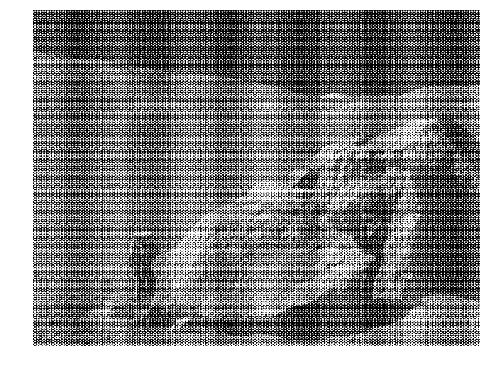

In [3]:
im = plt.imread('moonlanding.png').astype(float)

show(im)

# Frequência

## Calculando a Transformada de Fourrier

Text(0.5,1,'Fourier transform')

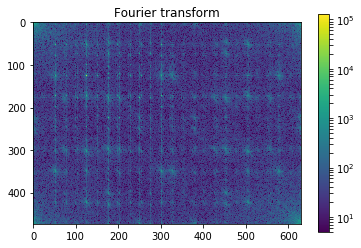

In [4]:
im_fft = fftpack.fft2(im)

# Show the results

def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()
plot_spectrum(im_fft)
plt.title('Fourier transform')

## Geração do Filtro na Frequência

Text(0.5,1,'Filtered Spectrum')

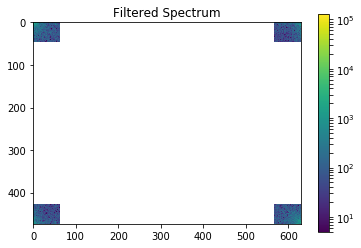

In [5]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

## Reconstrução da Imagem

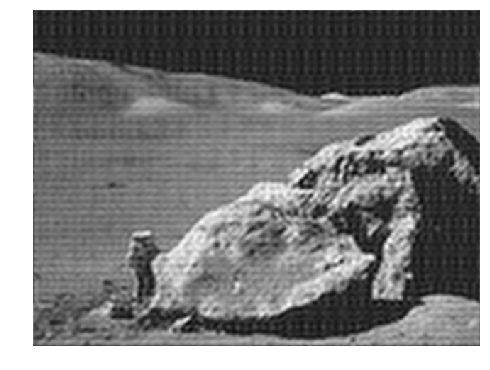

In [6]:
im_new = fftpack.ifft2(im_fft2).real

show(im_new)

## Suavizando

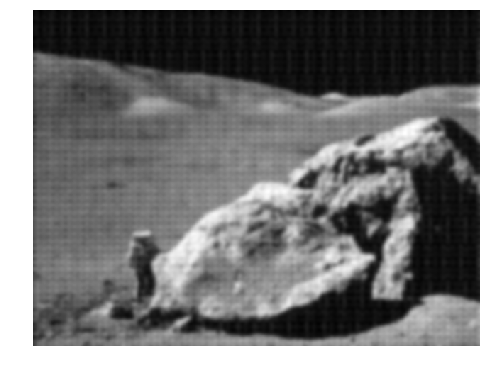

In [7]:

im_blur = ndimage.gaussian_filter(im, 3)

show(im_blur)

# Exercício

    Crie um novo notebook jupyter cujo nome deve seguir a seguinte syntaxe:
    
        lab4-SUAMATRICULA.ypnb

    Escolha uma imagem em escala de cinza e ruído.
    Escreva o código para carregar e mostrar a imagem.
    Escreva o código e mostre a imagem no domínio da frequência.
    Escreva o código e mostre uma das imagens filtrada utilizando a transformada de Fourier.
    Dada a imagem stp1.gif faça:
        Aplique o filtro um filtro passa alta (i.e. sobel, prewitt ou laplace) na stp1 e compare os resultados da transformada de Fourier antes e depois da aplicação do filtro.
    Dada a imagem stp2.gif faça:
        Aplique o filtro da média na stp2 e compare os resultados da transformada de Fourier antes e depois da aplicação do filtro.
    Compare os espectros da DFT(fft) e DCT da imagem escolhida.
        

## Extra:

Quantize as altas frequências da DCT e observe o que acontece com a qualidade da reconstrução.